<a href="https://colab.research.google.com/github/crismaque/Procesamiento_Digital-_de_Se-ales_PDS/blob/main/TALLER_3_PDS_Consulta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consulta
Qué pasa en la forma matricial cuando se cambia el tamaño de la matriz, la entrada es una señal (vector)?




En la Transformada de Fourier en forma matricial, el tamaño de la matriz de Fourier depende del número de muestras 𝑁.

Si aumentamos 𝑁, obtenemos una mayor resolución en frecuencia (mejor precisión en el dominio de la frecuencia) permitiendo distinguir frecuencias cercanas y reduciendo el aliasing (señal de alta frecuencia que parece tener una frecuencia más baja debido a una tasa de muestreo inadecuada.) pero aumenta el costo computacional.

Si disminuimos 𝑁, se reduce la carga del cálculo pero la resolución en frecuencia también disminuye, lo que puede causar pérdida de detalles en la señal transformada al dificultar la diferenciación de frecuencias cercanas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

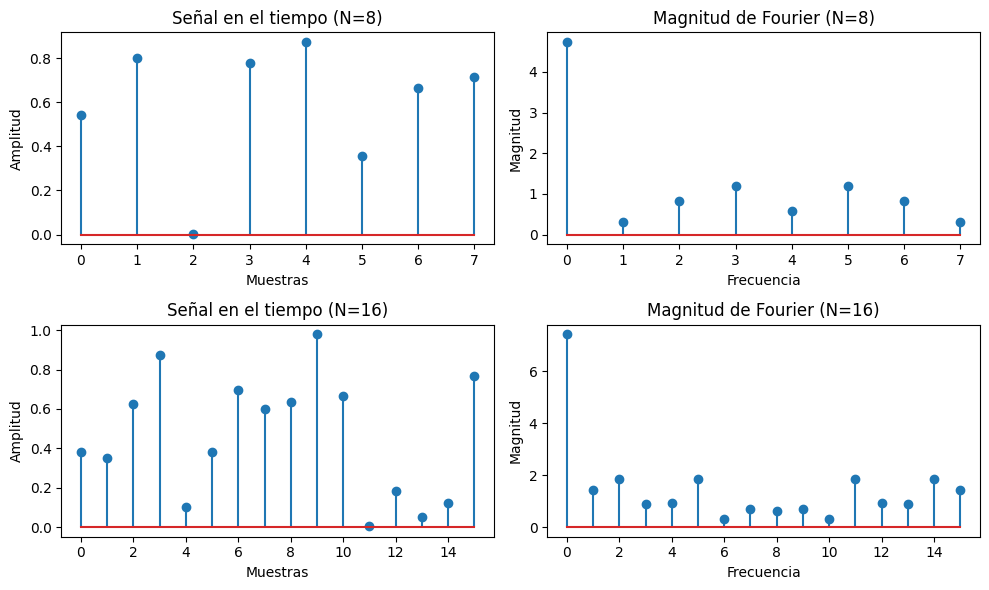

In [2]:
def fourier_matrix(N):
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N)  # Matriz de Fourier
    return W

def transform_signal(signal, N):
    W = fourier_matrix(N)
    return W @ signal  # Transformada de Fourier usando la matriz

# Señal de ejemplo
N1, N2 = 8, 16  # Dos tamaños distintos
signal1 = np.random.rand(N1) ; signal2 = np.random.rand(N2)  #Señales aleatorias N1 y N2

# Transformadas
F_signal1 = transform_signal(signal1, N1) ; F_signal2 = transform_signal(signal2, N2)


plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.stem(signal1) # Señal 1 en el tiempo
plt.title(f'Señal en el tiempo (N={N1})')
plt.xlabel('Muestras'); plt.ylabel('Amplitud')
plt.subplot(222)
plt.stem(np.abs(F_signal1)) #Transformada señal 1
plt.title(f'Magnitud de Fourier (N={N1})')
plt.xlabel('Frecuencia') ; plt.ylabel('Magnitud')
plt.subplot(223)
plt.stem(signal2) # Señal 2 en el tiempo
plt.title(f'Señal en el tiempo (N={N2})')
plt.xlabel('Muestras'); plt.ylabel('Amplitud')
plt.subplot(224)
plt.stem(np.abs(F_signal2)) # Transformada señal 2
plt.title(f'Magnitud de Fourier (N={N2})')
plt.xlabel('Frecuencia'); plt.ylabel('Magnitud')
plt.tight_layout() ; plt.show()